In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
new = np.genfromtxt('/Volumes/Spare Data/photRun0520/drcPhot29Apr/catDir_PISCES-II/PISCES-II_fullCat.dat',
                   names=True)

nov = np.genfromtxt('/Volumes/Spare Data/photRun0520/drcPhot10Nov/catDir_PISCES-II/PISCES-II_fullCat.dat',
                   names=True)

In [3]:
fullDRC = np.genfromtxt('/Volumes/Spare Data/photRun0520/drcPhot29Apr/catDir_PISCES-II/PISCES-II_matchedDRCfilt.dat',
                   names=True)

In [4]:
keepA = np.logical_and(np.logical_and(new['err_f606w']<=0.05,new['err_f814w']<=0.05),
                      np.logical_or(new['six_4_flag_f606w']==1,new['six_4_flag_f814w']==1))
keepN = np.logical_and(np.logical_and(nov['stdev_f606w']/np.sqrt(3)<=0.05,nov['stdev_f814w']/np.sqrt(3)<=0.05),
                      np.logical_or(nov['six_4_flag_f606w']==1,nov['six_4_flag_f814w']==1))

In [5]:
keepD = np.logical_or(fullDRC['six_4_flag_f606w']==1,fullDRC['six_4_flag_f814w']==1)

In [6]:
keepA2 = np.logical_and(np.logical_and(new['err_f606w']<=0.05,new['err_f814w']<=0.05),
                      np.logical_and(new['six_4_flag_f606w']==1,new['six_4_flag_f814w']==1))

In [7]:
keepN2 = np.logical_and(np.logical_and(nov['stdev_f606w']<=0.05/np.sqrt(3),nov['stdev_f814w']<=0.05/np.sqrt(3)),
                      np.logical_and(nov['six_4_flag_f606w']==1,nov['six_4_flag_f814w']==1))

In [8]:
print(len(new),len(nov))

1683 696


In [9]:
# error and star flag cut (OR)

newK = new[keepA]
novK = nov[keepN]

print(len(newK)/len(new))
print(len(novK)/len(nov))

0.38859180035650626
0.5445402298850575


In [10]:
print(len(newK),len(novK))

654 379


In [11]:
# color cut OR

newKCC = newK[newK['magr_f606w']-newK['magr_f814w']<=0]
novKCC = novK[novK['magr_f606w']-novK['magr_f814w']<=0]

print(len(newKCC),len(novKCC))

597 344


In [12]:
# error and star flag cut (AND)

newK2 = new[keepA2]
print(len(newK2))
novK2 = nov[keepN2]
print(len(novK2))

349
119


In [13]:
# color cut AND

newKCC2 = newK2[newK2['magr_f606w']-newK2['magr_f814w']<=0]
novKCC2 = novK2[novK2['magr_f606w']-novK2['magr_f814w']<=0]

print(len(newKCC2),len(novKCC2))

305 94


In [14]:
drcK = fullDRC[keepD]
print(len(drcK)/len(fullDRC))
drcKCC = drcK[drcK['magr_f606w']-drcK['magr_f814w']<=0]
print(len(drcKCC))

0.3616447590158409
907


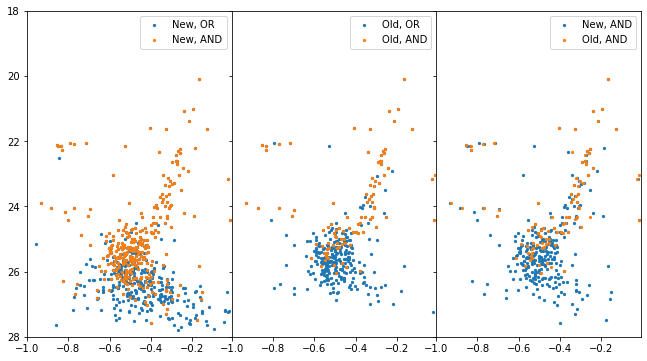

In [15]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(11,6),sharey=True,sharex=True)

ax1.scatter(newK['magr_f606w']-newK['magr_f814w'],newK['magr_f606w'],s=5,label='New, OR')
ax1.scatter(newK2['magr_f606w']-newK2['magr_f814w'],newK2['magr_f606w'],s=5,label='New, AND')

ax2.scatter(novK['magr_f606w']-novK['magr_f814w'],novK['magr_f606w'],s=5,label='Old, OR')
ax2.scatter(novK2['magr_f606w']-novK2['magr_f814w'],novK2['magr_f606w'],s=5,label='Old, AND')

ax3.scatter(newK2['magr_f606w']-newK2['magr_f814w'],newK2['magr_f606w'],s=5,label='New, AND')
ax3.scatter(novK2['magr_f606w']-novK2['magr_f814w'],novK2['magr_f606w'],s=5,label='Old, AND')

ax1.set_ylim(28,18)
ax1.set_xlim(-1.,-0.01)

ax1.legend()
ax2.legend()
ax3.legend()

plt.subplots_adjust(wspace=0)
plt.show()

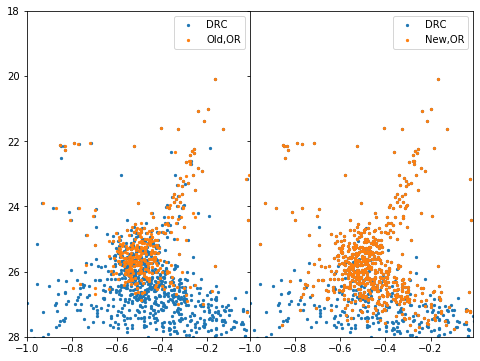

In [16]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(8,6),sharey=True,sharex=True)

ax1.scatter(drcK['magr_f606w']-drcK['magr_f814w'],drcK['magr_f606w'],s=5,label='DRC')
ax1.scatter(novK['magr_f606w']-novK['magr_f814w'],novK['magr_f606w'],s=5,label='Old,OR')

ax2.scatter(drcK['magr_f606w']-drcK['magr_f814w'],drcK['magr_f606w'],s=5,label='DRC')
ax2.scatter(newK['magr_f606w']-newK['magr_f814w'],newK['magr_f606w'],s=5,label='New,OR')

ax1.set_ylim(28,18)
ax1.set_xlim(-1.,-0.01)

ax1.legend()
ax2.legend()

plt.subplots_adjust(wspace=0)
plt.show()

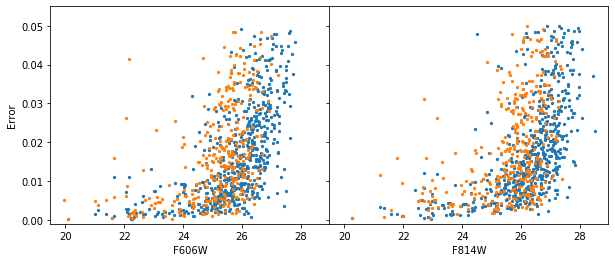

In [17]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,4),sharex=True,sharey=True)

ax1.scatter(newKCC['magr_f606w'],newKCC['err_f606w'],s=5)
ax1.scatter(novKCC['magr_f606w'],novKCC['stdev_f606w']/np.sqrt(3),s=5)

ax2.scatter(newKCC['magr_f814w'],newKCC['err_f814w'],s=5)
ax2.scatter(novKCC['magr_f814w'],novKCC['stdev_f814w']/np.sqrt(3),s=5)

ax1.set_ylim(-1e-3,0.055)
ax1.set_ylabel('Error')
ax1.set_xlabel('F606W')
ax2.set_xlabel('F814W')

plt.subplots_adjust(wspace=0)
plt.show()

In [18]:
print(np.mean(novKCC['stdev_f606w']/np.sqrt(3)))
print(np.mean(newKCC['err_f606w']))

0.016820631975242438
0.01657971833628042
